# A05-Q3Q4: DCT and JPEG Compression

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Q4: Discrete Cosine Transform

### Some helper functions

In [195]:
def even_extension(f):
    '''
     fe = even_extension(f)
     
     Performs an even extension on the array f.
    
     Input:
       f is a 2D array
    
     Output:
       fe is the even extension of f
    
     If f has dimensions NxM, then fe has dimensions
        (2*N-2)x(2*M-2)
     and fe[n,j]=fe[-n,j] for n=0,...,N-1
     and fe[n,j]=fe[n,-j] for j=0,...,M-1
    
     For example, if f is 5x4, then fe has dimensions 8x6.
    
     i_even_extension is the inverse of even_extension, so that
        i_even_extension(even_extension(f)) == f
     for any matrix f.
    
    '''
    fe = np.concatenate((f,np.fliplr(f[:,1:-1])), axis=1)
    fe = np.concatenate((fe, np.flipud(fe[1:-1,:])), axis=0)
    
    return fe

def i_even_extension(fe):
    '''
     f = i_even_extension(fe)
    
     Reverses the action of an even extension.
    
     Input:
       fe is a 2D array, assumed to contain an even extension
    
     Output:
       f is the sub-array that was used to generate the extension
    
     If fe has dimensions KxL, then f has dimensions
        ceil((K+1)/2) x ceil((L+1)/2)
     For example, if fe is 8x6, then f is 5x4.
    
     i_even_extension is the inverse of even_extension, so that
        i_even_extension(even_extension(f)) == f
     for any matrix f.
    
    '''
    e_dims = np.array(np.shape(fe))
    dims = np.ceil((e_dims+1.)/2)
    dims = np.array(dims, dtype=int)
    f = fe[:dims[0], :dims[1]]
    #f = fe(1:dims(1),1:dims(2));
    return f

def serialize(F, q):
    '''
     ser = serialize(F, q)
     
     Flattens the top-left elements of the 2D array F.
     
     Inputs:
      F  2D array
      q  number of element of F to serialize
      
     Output:
      s  (q,) array
      
     Example:
      > s = serialize(array([[1,2,3],
                             [4,5,6],
                             [7,8,9]]), 5)
      > print(s)
      
      [1, 4, 2, 7, 5]
    '''
    T = len(F)
    Fr = np.rot90(F.T)
    flat = np.array([Fr[-1,0]])
    for r in np.arange(2-T, T):
        d = np.diag(Fr, k=r)
        flat = np.concatenate((flat, d))
    return flat[:q]

def deserialize(c, T):
    '''
     F = deserialize(coefs, T)
     
     Unflattens the coefficients in c into the lop-left corner of
     a (T,T) array.
     
     Inputs:
      c  1D array of coefficients
      T  dimension of output array
      
     Output:
      F  (T,T) array
      
     Example:
      > s = array([1, 4, 2, 7, 5])
      > F = deserialize(s, 3)
      > print(F)
      
      [[1, 2, 0],
       [4, 5, 0],
       [7, 0, 0]]
    '''
    G = np.zeros((T,T))
    q = len(c)
    ptr = 0
    cfull = np.zeros((T**2,))
    cfull[:q] = c
    for r in np.arange(1-T, T):
        elems = T - abs(r)
        G += np.diagflat(cfull[ptr:ptr+elems], k=r)
        ptr += elems
    return np.rot90(G, k=3).T

def num_elements(f):
    '''
     n = num_elements(f) returns the total number of elements in the array f.
     
     For example,
       num_elements( np.ones((5,4)) )
     returns the value 20.
    '''
    return np.prod(np.shape(f))

def show(g, title=''):
    '''
     show(g, title='')
     
     Displays the image g as a graylevel image with intensities
     clipped to the range [0,255].
    '''
    plt.imshow(np.clip(g, a_min=0, a_max=255)/255., cmap='gray');
    plt.axis('off');
    plt.title(title);

In [196]:
# Define a simple 2-D array to play with
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=float)
print(f)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [197]:
# Even extension
fe = even_extension(f)
print(fe)

[[ 1.  2.  3.  4.  3.  2.]
 [ 5.  6.  7.  8.  7.  6.]
 [ 9. 10. 11. 12. 11. 10.]
 [ 5.  6.  7.  8.  7.  6.]]


In [198]:
# Check that it's even, if you don't believe me
n = np.random.randint(np.shape(f)[0])
j = np.random.randint(np.shape(f)[1])
print((n,j))
print(fe[n,j])
print(fe[-n,-j])

(1, 1)
6.0
6.0


In [199]:
# Inverse even extension
g = i_even_extension(fe)
print(g)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


## `myDCT2`

In [200]:
def myDCT2(f):
    '''
     Fdct = myDCT2(f)
    
     Computes the 2-D Discrete Cosine Transform of input image f.
     It uses an even extension of f, along with the 2D-DFT.
     This function is the inverse of myIDCT2.
    
     Input:
      f is a 2-D array of real values
    
     Output:
      Fdct is a real-valued array the same size as f
    '''
    
    # Our steps:
    # We have a 2d array, we will compute the DCT of our 2d array
    # we preform an even extension to get f_extend
    # Use the fft function on f_extend
    
    # Take only the first N coefficients of each row
    # DCT is completed
    
    Fdct = []
    
    r = len(f)
    c = len(f[0])
    f_extend = even_extension(f)

    
    dft2 = np.fft.fft2(f_extend)
    
    for i in range(r):
        row = []
        for j in range(c):
            row.append(dft2[i][j].real)
        
        Fdct.append(row)
 
    Fdct = np.array(Fdct)
    return Fdct

## `myIDCT2`

In [201]:
def myIDCT2(Fdct):
    '''
     f = myIDCT2(Fdct)
    
     Computes the 2-D Inverse Discrete Cosine Transform (IDCT) of input
     array Fdct. It uses an even extension of Fdct, along with the 2D-IDFT.
     This function is the inverse of myDCT2.
    
     Input:
      Fdct is a 2-D array of real values
    
     Output:
      f is a real-valued array the same size as Fdct
    '''
    
    '''
    inv_dft = np.fft.ifft2(Fdct)
    f_contract = i_even_extension(inv_dft)
    '''
    
    f_contract = even_extension(Fdct)
    inv_dft = np.fft.ifft2(f_contract)
    inv_dft = i_even_extension(inv_dft)
    
    
    return np.real(inv_dft)

In [202]:
# Test
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=float)
F = myDCT2(f)
print(F)
print("Above is DCT")
g = myIDCT2(F)
print(g)
print("Above is IDCT")

[[156. -16.   0.  -4.]
 [-48.   0.   0.   0.]
 [  0.   0.   0.   0.]]
Above is DCT
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
Above is IDCT


In [203]:
from scipy.fftpack import dct, idct
FF = dct(dct(np.real(f), type=1, axis=1), type=1, axis=0)
print(FF)

[[ 1.5600000e+02 -1.6000000e+01 -8.8817842e-16 -4.0000000e+00]
 [-4.8000000e+01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]]


## (a) `encode_tile` and `decode_tile`

In [205]:
def encode_tile(f, q):
    '''
     c = encode_tile(f, q)
     
     Encode the 2D image using q DCT coefficients.
     
     Inputs:
      f  a square array (with at least q elements)
      q  number of coefficients to keep
      
     Output:
      d  (q,) array of coefficients
    '''
    
    '''
    transform = dct(dct(np.real(f), type=1, axis=1), type=1, axis=0)
    encoded = serialize(np.array(transform), q)
    '''
    
    transform = myDCT2(f)
    encode = serialize(transform, q)
    # print(encode)
    return encode

def decode_tile(d, T):
    '''
     g = decode_tile(d, T)
     
     Reconstruct the (T,T) tile from DCT coefficients.
     
     Inputs:
      d  (q,) array of coefficients
      T  dimension of square tile to reconstruct
      
     Output:
      g  (T,T) array
    '''
    
    deserial = deserialize(d, T)
    # print(deserial)
    decoded = myIDCT2(deserial)
    
    # print(decoded)

    return np.array(decoded)



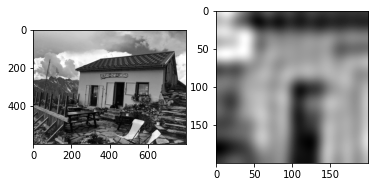

In [206]:
# Function Illustrations
f = plt.imread('Swiss_refuge.jpg')[:,:,0]  # read in an image
ftile = f[200:400,200:400]  # This is a 200x200 tile from that image
# plt.imshow(f,cmap='gray')
ecd = encode_tile(ftile, 150)
#print(ecd)
#print("HHH")
dcd = decode_tile(ecd, 200)

p, axarr = plt.subplots(1,2)
axarr[0].imshow(f,cmap='gray')
axarr[1].imshow(dcd, cmap='gray')



## (b) `JPEG_encode`

In [215]:
def JPEG_encode(f, T, q):
    '''
     G = JPEG_encode(f, T, q)
    
     Input
        f is the input image, a 2D array of real numbers
        T is the tile size to break the input image into
        q is the number of Fourier coefficients to keep for each tile
          (Bigger values of q result in less loss, but less compression)
    
     Output
        G is a (M,N,q) array containing the compressed encoding of the image
    
     Example: If f is 120x142, then
    
        G = JPEG_compress(f, 10, 7)
    
     would return an array (G) of size 12x14x7.    
    '''
    h,w = np.shape(f)  # returns the width and height of f
    
    # Top-left coords for tiles
    wtiles = np.arange(0, w-T+1, T)
    htiles = np.arange(0, h-T+1, T)
    
    # G is the encoding
    G = np.zeros( (len(htiles), len(wtiles), q) )
    
    # Loop over tiles
    for C,c in enumerate(wtiles):
        for R,r in enumerate(htiles):
            
            # Extract a TxT tile from the image.
            ftile = f[r:r+T, c:c+T]
            
            e_tile = encode_tile(ftile, q)
            
            G[R,C] = np.array(e_tile)
            
    return G

## (c) `JPEG_decode`

In [216]:
def JPEG_decode(G, T):
    '''
     f = JPEG_decode(G, T)
    
     Input
        G is the compressed encoding, a 3D array of real numbers
        T is the tile size for reassembling the decompressed image
    
     Output
        f is the reconstructed image
    
     Example: If G is 12x14x7, then
    
        f = JPEG_decode(G, 10);
    
     would return an array (f) of size 120x140.
    '''
    # Dimension of grid of tiles to reconstruct
    n_htiles, n_wtiles, _ = G.shape
    
    # f will hold the reconstruction
    f = np.zeros( (T*n_htiles, T*n_wtiles) )
    
    # Top-left coords for tiles
    wtiles = np.arange(0, np.shape(f)[1], T)
    htiles = np.arange(0, np.shape(f)[0], T)
    
    # Loop over tiles
    for C,c in enumerate(wtiles):
        for R,r in enumerate(htiles):
            
            f[r:r+T, c:c+T] = decode_tile(G[R,C], T)
        
    return f

In [211]:
# FOR TESTING PURPOSES

f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12], [13,14,15,16]], dtype=float)
jenc = JPEG_encode(f, 2, 2)
print(jenc)
JPEG_decode(jenc, 2)


[[[14. -8.]
  [22. -8.]]

 [[46. -8.]
  [54. -8.]]]
[[1.5 1.5]
 [5.5 5.5]]
NEXT
[[ 9.5  9.5]
 [13.5 13.5]]
NEXT
[[3.5 3.5]
 [7.5 7.5]]
NEXT
[[11.5 11.5]
 [15.5 15.5]]
NEXT


array([[ 1.5,  1.5,  3.5,  3.5],
       [ 5.5,  5.5,  7.5,  7.5],
       [ 9.5,  9.5, 11.5, 11.5],
       [13.5, 13.5, 15.5, 15.5]])

## (d) Demonstrate Compression

(600, 800)


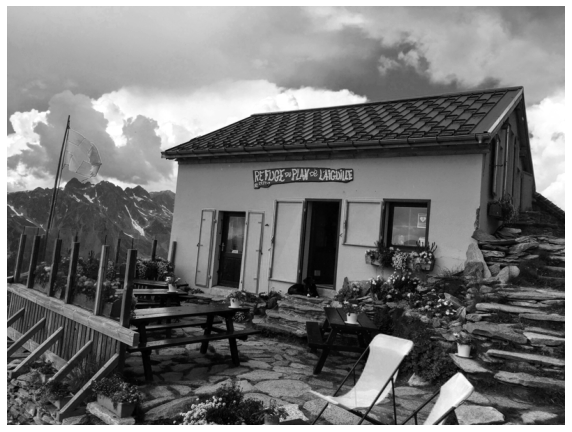

In [212]:
f = plt.imread('Swiss_refuge.jpg')[:,:,0]
plt.figure(figsize=[10,10]); show(f)
print(np.shape(f))



Text(0.5, 1.0, 'Compression ratio 8:1')

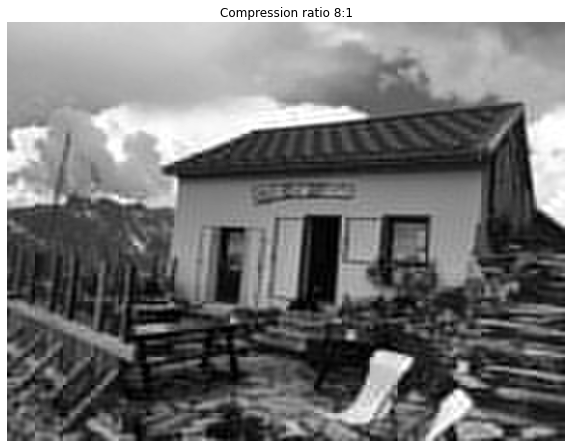

In [227]:
# Compression ratio 8:1
jenc = JPEG_encode(f, 40, 38)
compressed = JPEG_decode(jenc, 40)
plt.figure(figsize=[10,10]); show(compressed)
plt.title("Compression ratio 8:1")

# We have 600 x 800 pixels
# Equals 480,000 pixels
# we want ~ 8:1 ratio compression with 40 tiles
# About 60 000 pixels
# 60 000 / 40^2 = 37.5
# choose 38 as q


Text(0.5, 1.0, 'Compression ratio 40:1')

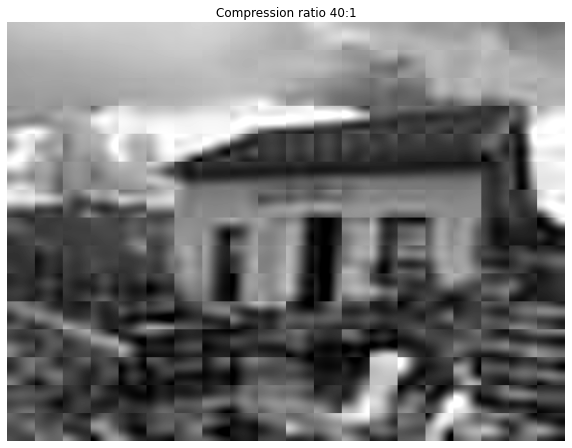

In [228]:
# Compression ratio 40:1

jenc = JPEG_encode(f, 40, 8)
compressed = JPEG_decode(jenc, 40)
plt.figure(figsize=[10,10]); show(compressed)
plt.title("Compression ratio 40:1")

# We have 600 x 800 pixels
# Equals 480,000 pixels
# we want ~ 40:1 ratio compression with 40 tiles
# About 12 000 pixels
# 12 000 / 40^2 = 7.5
# choose 8 as q


Text(0.5, 1.0, 'Compression ratio 160:1')

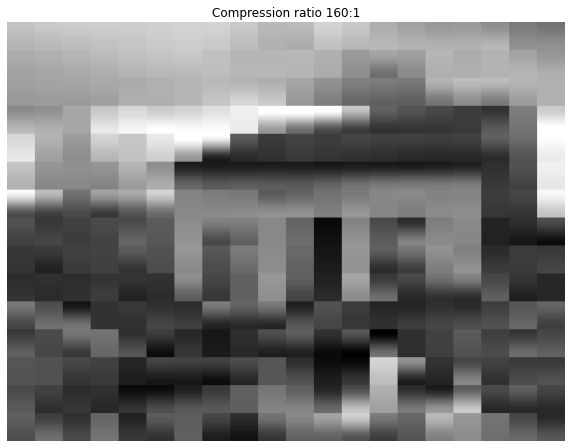

In [229]:
# Compression ratio 160:1

jenc = JPEG_encode(f, 40, 2)
compressed = JPEG_decode(jenc, 40)
plt.figure(figsize=[10,10]); show(compressed)
plt.title("Compression ratio 160:1")

# We have 600 x 800 pixels
# Equals 480,000 pixels
# we want ~ 160:1 ratio compression with 40 tiles
# About 3000 pixels
# 3000 / 40^2 = 1.875
# choose 2 as q



In [20]:
# Display the reconstructions of all the compressed images.
